In [116]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as mtpy
import numpy as np
#estilos
mtpy.style.use('classic')
%matplotlib inline

In [117]:
#leitura de arquivo .csv do  Repositório de Dados Eleitorais 
dados = pd.read_csv(r'C:\Users\joaom\perfil_comparecimento_abstencao_2020.csv' , sep = ";" , encoding = "Latin 1")

In [118]:
dados.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,75 a 79 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,269,65,204,3,6,3,16
1,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,85 a 89 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,78,3,75,0,0,1,5
2,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,95 a 99 anos,6,ENSINO MÉDIO COMPLETO,2,0,2,0,0,0,0
3,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,30 a 34 anos,1,ANALFABETO,1,1,0,0,0,0,0
4,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0


In [119]:
dados.columns.values

array(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_TURNO', 'SG_UF',
       'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'CD_GENERO',
       'DS_GENERO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL',
       'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE',
       'DS_GRAU_ESCOLARIDADE', 'QT_APTOS', 'QT_COMPARECIMENTO',
       'QT_ABSTENCAO', 'QT_COMPARECIMENTO_DEFICIENCIA',
       'QT_ABSTENCAO_DEFICIENCIA', 'QT_COMPARECIMENTO_TTE',
       'QT_ABSTENCAO_TTE'], dtype=object)

Selecionando colunas que serão utilizadas para fazer as comparações por abstenção

<h2>ABSTENÇÃO PRIMEIRO TURNO</h2>


In [120]:
Por_turno = ['DS_FAIXA_ETARIA','QT_ABSTENCAO', 'NM_MUNICIPIO', 'SG_UF','NR_TURNO','QT_COMPARECIMENTO']

In [121]:
dadosTurno = dados.filter(items=Por_turno)

DADOS ABSTENÇÃO POR MUNÍCIPIO(SP,MIN E MAX)

In [170]:
turno1 = dadosTurno.query("NR_TURNO =='1'")#Escolher turno
turno2 = turno1.query("SG_UF =='SP'")#escolher UF
turno1.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values()#agrupando por município e abstenção

NM_MUNICIPIO
LAJEADO GRANDE           53
SANTIAGO DO SUL          59
MAREMA                   59
SERRA DA SAUDADE         64
QUATRO IRMÃOS            66
                     ...   
CURITIBA             407421
SALVADOR             501993
BELO HORIZONTE       550633
RIO DE JANEIRO      1590877
SÃO PAULO           2632592
Name: QT_ABSTENCAO, Length: 5295, dtype: int64

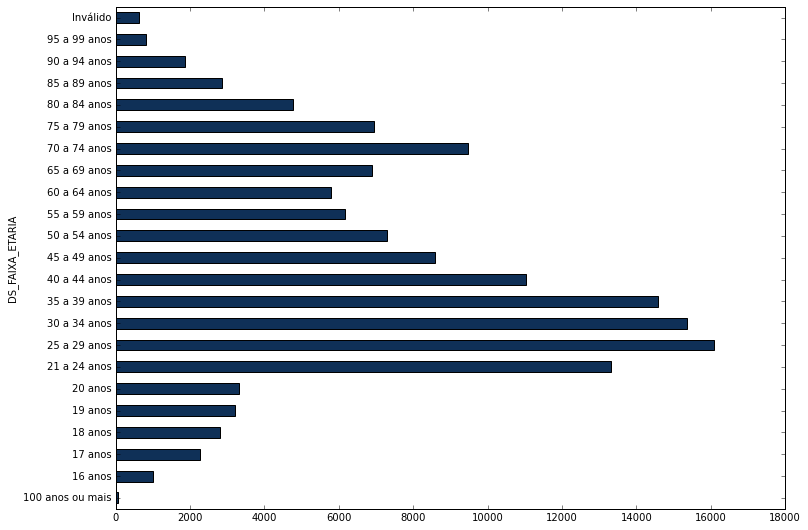

In [123]:
turno = dadosTurno.query("NR_TURNO =='1'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO JOSÉ DOS CAMPOS'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index()

In [181]:
estadoSp = dadosTurno.query('SG_UF == "SP"').query("NR_TURNO =='2'").query("NM_MUNICIPIO =='SÃO PAULO'").groupby(['DS_FAIXA_ETARIA'])['QT_COMPARECIMENTO'].sum()
estadoSp

DS_FAIXA_ETARIA
100 anos ou mais        19
16 anos              50498
17 anos              87600
18 anos             108143
19 anos             114191
20 anos             114690
21 a 24 anos        460627
25 a 29 anos        573001
30 a 34 anos        656146
35 a 39 anos        719576
40 a 44 anos        669514
45 a 49 anos        624016
50 a 54 anos        608284
55 a 59 anos        538102
60 a 64 anos        445493
65 a 69 anos        276456
70 a 74 anos        100374
75 a 79 anos         39532
80 a 84 anos         14115
85 a 89 anos          3755
90 a 94 anos           684
95 a 99 anos            77
Inválido             12773
Name: QT_COMPARECIMENTO, dtype: int64

In [124]:
#Por grupo
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [125]:
colunas = ['Comparecimento São José dos Campos']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupo = pd.DataFrame(data=data, index=index, columns=colunas)
grupo

,Comparecimento São José dos Campos
Idosos á partir dos 60,39413
Meia Idade,47687
Jovens até 30 anos,57418


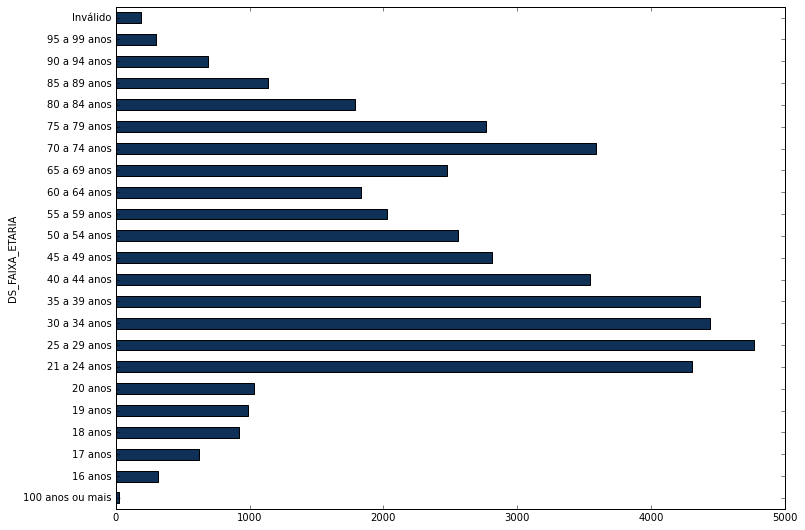

In [126]:
turno = dadosTurno.query("NR_TURNO =='1'")
turnoCidade = turno.query("NM_MUNICIPIO =='JACAREÍ'")
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index()

In [127]:
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [128]:
colunas = ['Comparecimento São José dos Campos']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupo = pd.DataFrame(data=data, index=index, columns=colunas)
grupo

,Comparecimento São José dos Campos
Idosos á partir dos 60,14581
Meia Idade,15301
Jovens até 30 anos,17389


COMPARAÇÃO DO PRIMEITO TURNO (SÃO JOSÉ DOS CAMPOS X JACAREÍ)

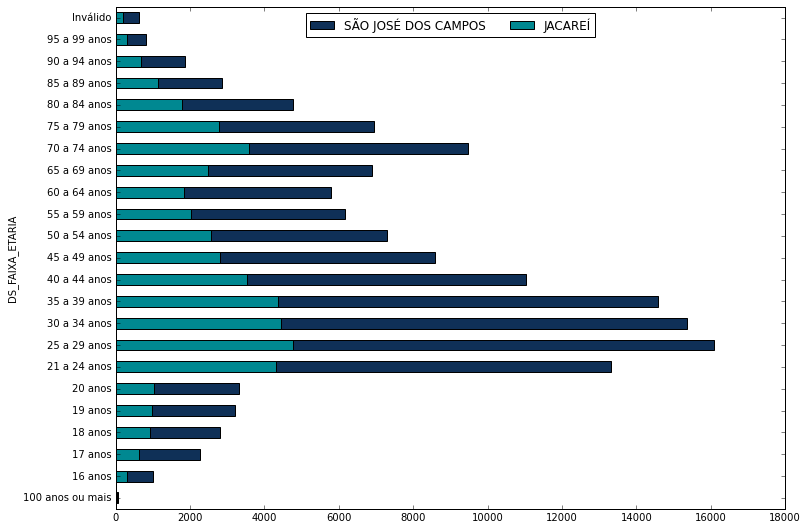

In [129]:

turno = dadosTurno.query("NR_TURNO =='1'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO JOSÉ DOS CAMPOS'")
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')

turno = dadosTurno.query("NR_TURNO =='1'")#jacareí também não
turnoCidade = turno.query("NM_MUNICIPIO =='JACAREÍ'")
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#008891')
mtpy.legend(['SÃO JOSÉ DOS CAMPOS', 'JACAREÍ'], loc='upper center', ncol = 4)

<h3>ABSTENÇÃO SEGUNDO TURNO</h3>

In [130]:
turno = dadosTurno.query("NR_TURNO =='2'")
turno2 = turno.query("SG_UF =='SP'")
turno2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values()


NM_MUNICIPIO
TABOÃO DA SERRA      63955
LIMEIRA              69732
TAUBATÉ              72373
PRAIA GRANDE         73930
FRANCA               78422
SÃO VICENTE          80462
MAUÁ                 86621
BAURU                86636
DIADEMA              95937
MOGI DAS CRUZES      99370
PIRACICABA          100194
SOROCABA            138912
RIBEIRÃO PRETO      157340
GUARULHOS           207848
CAMPINAS            297297
SÃO PAULO          2769021
Name: QT_ABSTENCAO, dtype: int64

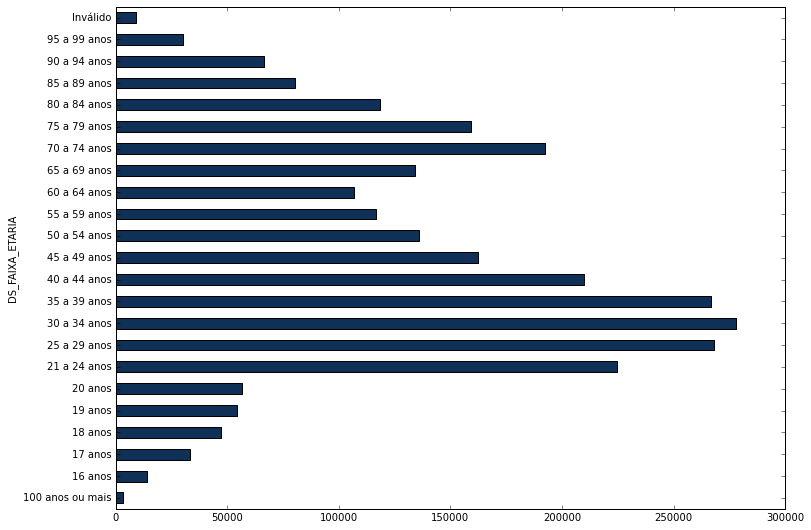

In [131]:
turno = dadosTurno.query("NR_TURNO =='2'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO PAULO'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index()

In [132]:
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [133]:
colunas = ['Abstenção']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupos = pd.DataFrame(data=data, index=index, columns=colunas)
grupos

,Abstenção
Idosos á partir dos 60,888208
Meia Idade,891845
Jovens até 30 anos,976826


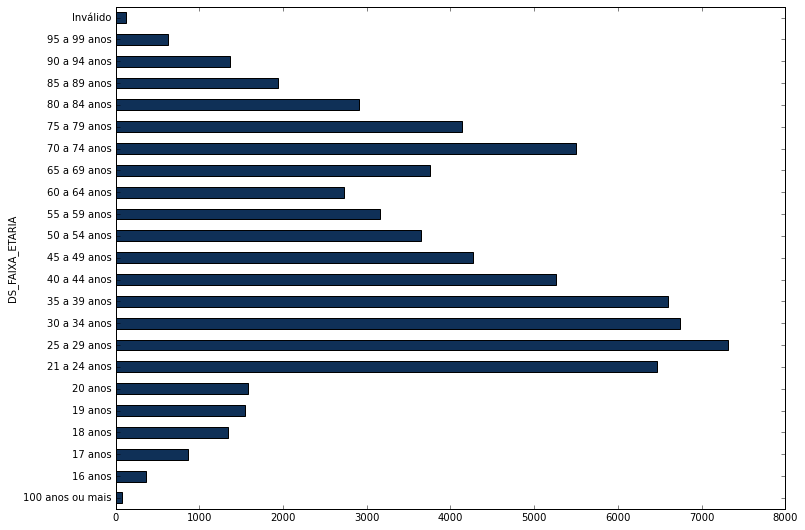

In [134]:
turno = dadosTurno.query("NR_TURNO =='2'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='TAUBATÉ'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index()

In [135]:
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [136]:
colunas = ['Abstenção São Paulo']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupos = pd.DataFrame(data=data, index=index, columns=colunas)
grupos

,Abstenção São Paulo
Idosos á partir dos 60,22987
Meia Idade,22945
Jovens até 30 anos,26230


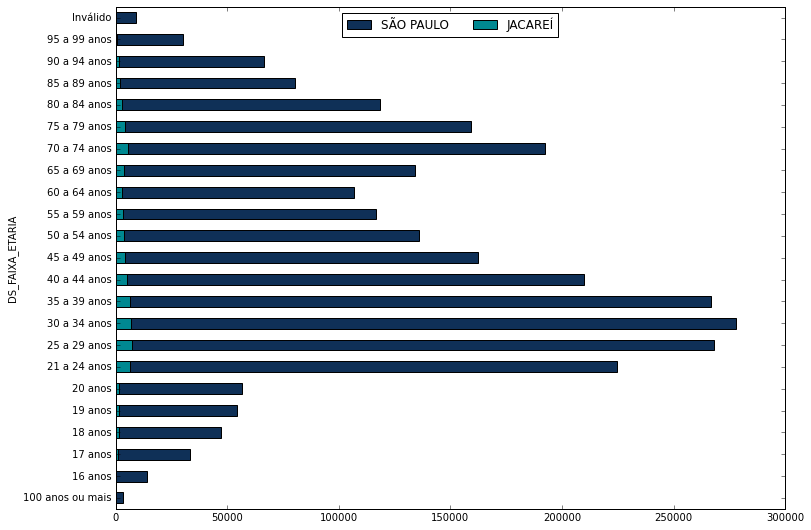

In [137]:
turno = dadosTurno.query("NR_TURNO =='2'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO PAULO'")
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')

turno = dadosTurno.query("NR_TURNO =='2'")#jacareí também não
turnoCidade = turno.query("NM_MUNICIPIO =='TAUBATÉ'")
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#008891')
mtpy.legend(['SÃO PAULO', 'JACAREÍ'], loc='upper center', ncol = 4)

<h2>Comparação de abstenção do segundo turno entre cidades</h2>

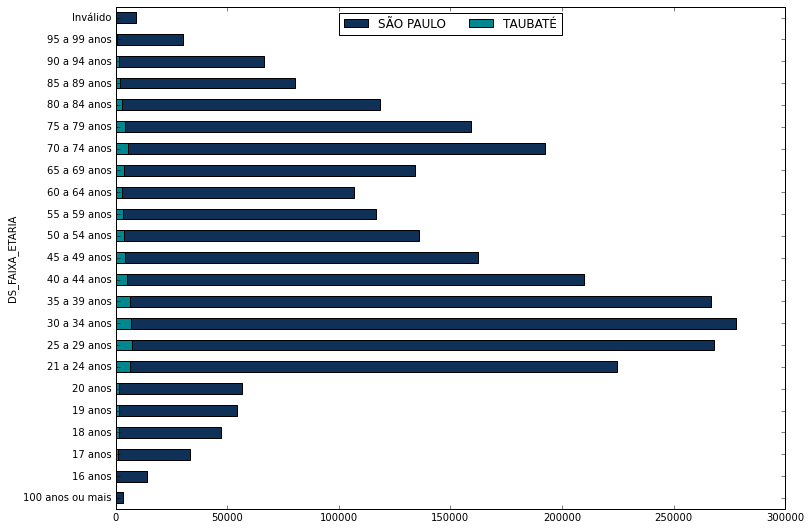

In [138]:
turno = dadosTurno.query("NR_TURNO =='2'")
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO PAULO'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')

turno = dadosTurno.query("NR_TURNO =='2'")
turnoCidade = turno.query("NM_MUNICIPIO =='TAUBATÉ'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#008891')
mtpy.legend(['SÃO PAULO', 'TAUBATÉ'], loc='upper center', ncol = 4)

<h2>COMPARECIMENTO</h2>

In [139]:
turno1 = dadosTurno.query("NR_TURNO =='1'")#Escolher turno
turno2 = turno1.query("SG_UF =='SP'")#escolher UF
turno2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values()#agrupando por município e abstenção

NM_MUNICIPIO
BORÁ                         930
NOVA CASTILHO               1126
PRACINHA                    1161
BALBINOS                    1196
FERNÃO                      1326
                          ...   
OSASCO                    407183
SÃO BERNARDO DO CAMPO     455094
CAMPINAS                  583284
GUARULHOS                 700764
SÃO PAULO                6354095
Name: QT_COMPARECIMENTO, Length: 645, dtype: int64

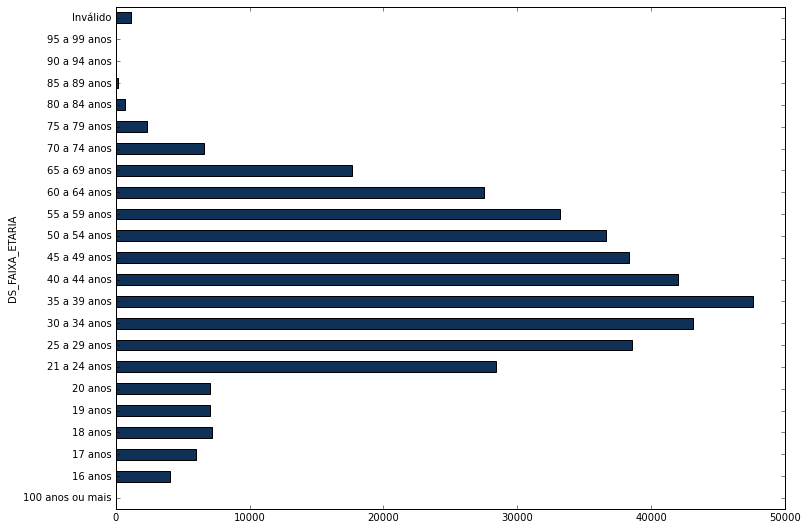

In [140]:
#SÃO JOSE DOS CAMPO(ABSTENÇÃO POR FAIXA NO PRIMEIRO TURNO)
turno = dadosTurno.query("NR_TURNO =='1'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO JOSÉ DOS CAMPOS'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index()

In [141]:
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [142]:
colunas = ['Comparecimento São José dos Campos Primeiro turno']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupo = pd.DataFrame(data=data, index=index, columns=colunas)
grupo

,Comparecimento São José dos Campos Primeiro turno
Idosos á partir dos 60,55046
Meia Idade,197761
Jovens até 30 anos,141332


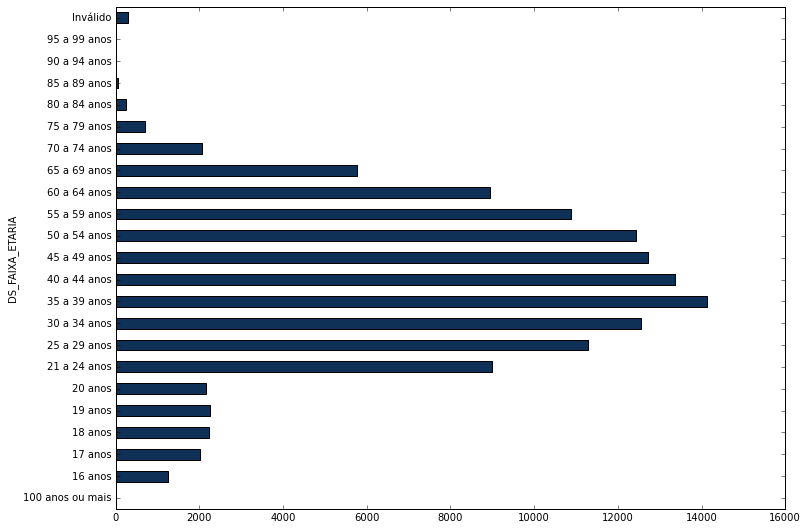

In [143]:
turno = dadosTurno.query("NR_TURNO =='1'")
turnoCidade = turno.query("NM_MUNICIPIO =='JACAREÍ'")
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index()

In [144]:
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [145]:
colunas = ['Comaparecimento Jacareí']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupos = pd.DataFrame(data=data, index=index, columns=colunas)
grupos

,Comaparecimento Jacareí
Idosos á partir dos 60,17799
Meia Idade,63521
Jovens até 30 anos,42754


<h2>Comparecimento de cidades que tiveram segundo turno</h2>

In [146]:
turno = dadosTurno.query("NR_TURNO =='2'")
turno2 = turno.query("SG_UF =='SP'")
turno2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values()

NM_MUNICIPIO
PRAIA GRANDE        152330
TABOÃO DA SERRA     153524
TAUBATÉ             156827
LIMEIRA             156895
FRANCA              159702
SÃO VICENTE         171684
BAURU               184113
PIRACICABA          190804
MAUÁ                219897
MOGI DAS CRUZES     220456
DIADEMA             233234
RIBEIRÃO PRETO      284505
SOROCABA            347050
CAMPINAS            546136
GUARULHOS           665032
SÃO PAULO          6217666
Name: QT_COMPARECIMENTO, dtype: int64

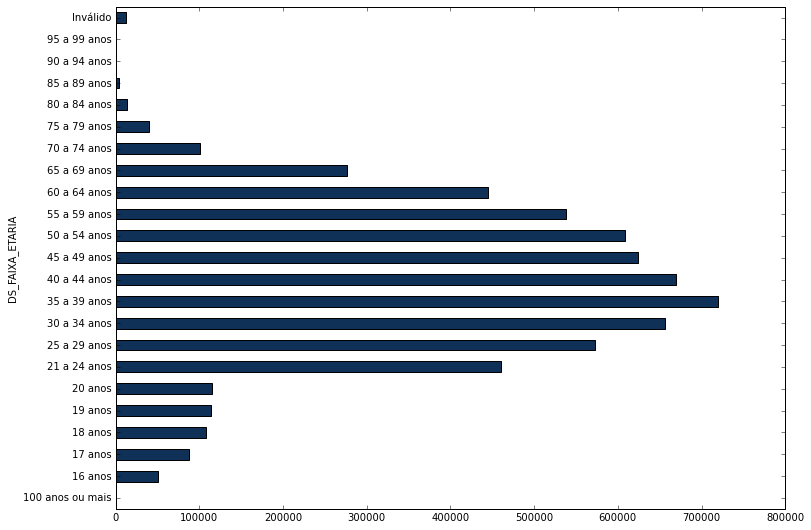

In [147]:
turno = dadosTurno.query("NR_TURNO =='2'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO PAULO'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index()

In [148]:
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [149]:
colunas = ['Abstenção ']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupos = pd.DataFrame(data=data, index=index, columns=colunas)
grupos

,Abstenção
Idosos á partir dos 60,880486
Meia Idade,3159492
Jovens até 30 anos,2164896


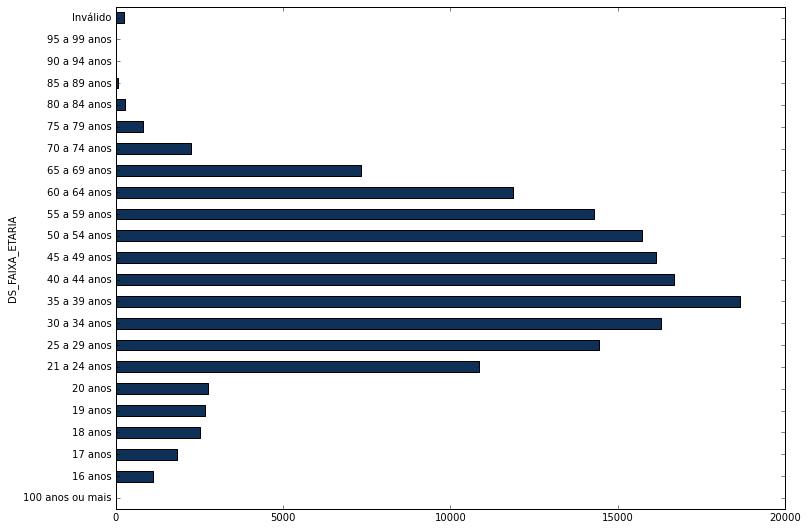

In [150]:
turno = dadosTurno.query("NR_TURNO =='2'")#sjc não tem segundo turno
turnoCidade = turno.query("NM_MUNICIPIO =='TAUBATÉ'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index()

In [151]:
jovens = Grupos[1:9]
meia_idade = Grupos[9:14]
Idosos = Grupos[14:22]

In [152]:
colunas = ['Abstenção']
index = [ 'Idosos á partir dos 60','Meia Idade', 'Jovens até 30 anos'] 
data = [Idosos.sum(),meia_idade.sum(),jovens.sum()]
grupos = pd.DataFrame(data=data, index=index, columns=colunas)
grupos

,Abstenção
Idosos á partir dos 60,22626
Meia Idade,81472
Jovens até 30 anos,52465


<h2>Comparação de comparecimento do segundo turno</h2>

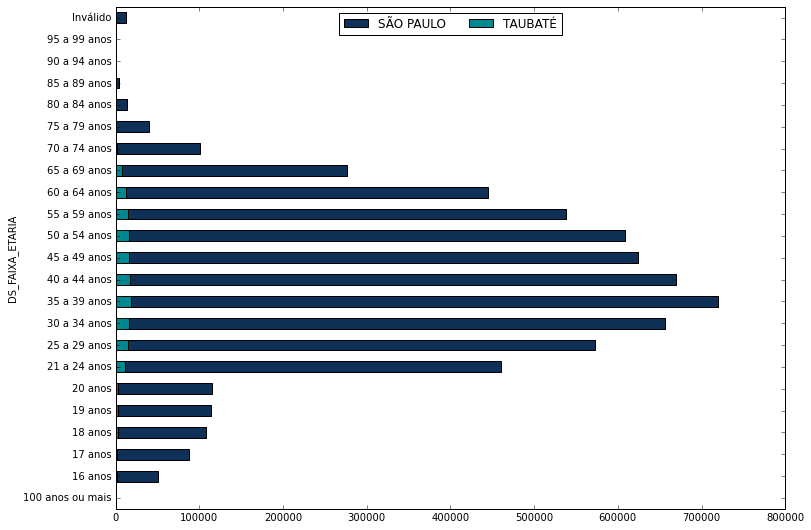

In [153]:
turno = dadosTurno.query("NR_TURNO =='2'")
turnoCidade = turno.query("NM_MUNICIPIO =='SÃO PAULO'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')

turno = dadosTurno.query("NR_TURNO =='2'")
turnoCidade = turno.query("NM_MUNICIPIO =='TAUBATÉ'")#Escolher a cidade
turnoCidade.groupby('DS_FAIXA_ETARIA')['QT_COMPARECIMENTO'].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#008891')
mtpy.legend(['SÃO PAULO', 'TAUBATÉ'], loc='upper center', ncol = 4)

<h2>GRÁFICOS RELEVANTES PRIMEIRO TURNO </h2>


In [154]:
#Maior Abstenção entre o municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nlargest(5)

NM_MUNICIPIO
SÃO PAULO                2632592
CAMPINAS                  260149
GUARULHOS                 172116
SÃO BERNARDO DO CAMPO     165087
SANTO ANDRÉ               164255
Name: QT_ABSTENCAO, dtype: int64

In [155]:
#Menor Abstenção entre municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nsmallest(5)

NM_MUNICIPIO
NOVA CASTILHO          104
BORÁ                   131
SÃO JOÃO DE IRACEMA    134
PRACINHA               139
URU                    147
Name: QT_ABSTENCAO, dtype: int64

In [156]:
#Maior Comparecimento entre o municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nlargest(5)

NM_MUNICIPIO
SÃO PAULO                6354095
GUARULHOS                 700764
CAMPINAS                  583284
SÃO BERNARDO DO CAMPO     455094
OSASCO                    407183
Name: QT_COMPARECIMENTO, dtype: int64

In [157]:
#Menor Comparecimento entre municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nsmallest(5)

NM_MUNICIPIO
BORÁ              930
NOVA CASTILHO    1126
PRACINHA         1161
BALBINOS         1196
FERNÃO           1326
Name: QT_COMPARECIMENTO, dtype: int64

<AxesSubplot:ylabel='NM_MUNICIPIO'>

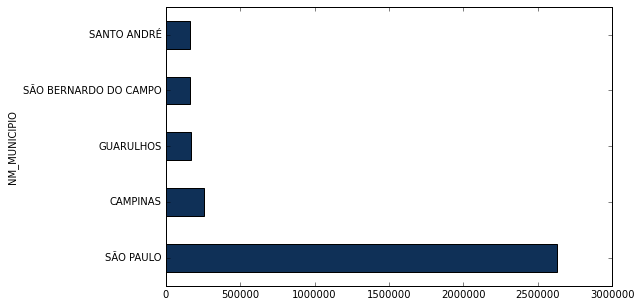

In [158]:
#TOP 5 MAIOR ABSTENÇÃO
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nlargest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')

<AxesSubplot:ylabel='NM_MUNICIPIO'>

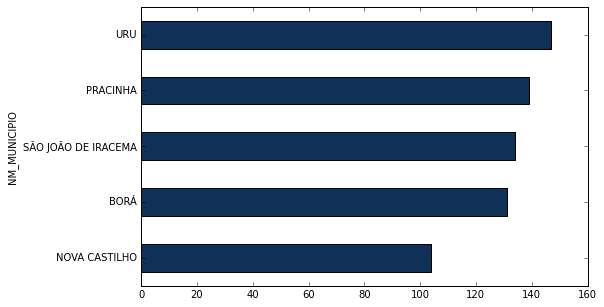

In [159]:
#TOP 5 MENOR ABSTENÇÃO
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nsmallest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')

<AxesSubplot:ylabel='NM_MUNICIPIO'>

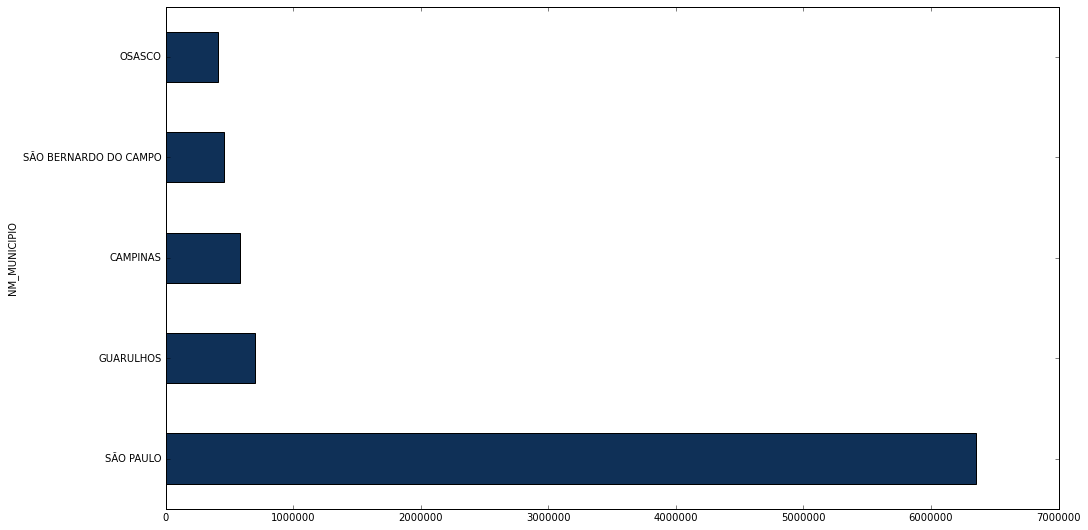

In [160]:
#TOP5 MAIOR COMPARECIMENTO
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nlargest(5).plot(kind='barh', figsize=(16,9),color = '#0f3057')

<AxesSubplot:ylabel='NM_MUNICIPIO'>

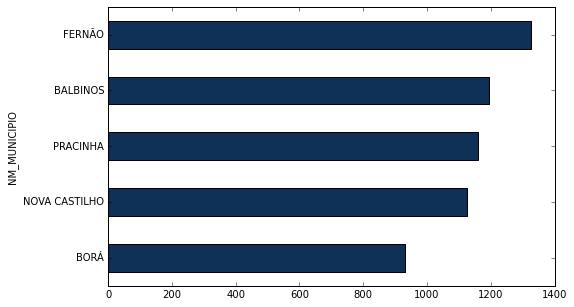

In [161]:
#TOP5 MENOR COMPARECIMENTO
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nsmallest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')

<h2>GRÁFICOS RELEVANTES SEGUNDO TURNO </h2>

In [162]:
#Maior Abstenção entre o municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='2'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nlargest(5)

NM_MUNICIPIO
SÃO PAULO         2769021
CAMPINAS           297297
GUARULHOS          207848
RIBEIRÃO PRETO     157340
SOROCABA           138912
Name: QT_ABSTENCAO, dtype: int64

In [163]:
#Menor Abstenção entre municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='2'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nsmallest(5)

NM_MUNICIPIO
TABOÃO DA SERRA    63955
LIMEIRA            69732
TAUBATÉ            72373
PRAIA GRANDE       73930
FRANCA             78422
Name: QT_ABSTENCAO, dtype: int64

In [164]:
#Maior Comparecimento entre o municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='2'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nlargest(5)

NM_MUNICIPIO
SÃO PAULO         6217666
GUARULHOS          665032
CAMPINAS           546136
SOROCABA           347050
RIBEIRÃO PRETO     284505
Name: QT_COMPARECIMENTO, dtype: int64

In [165]:
#Menor Comparecimento entre municípios do estado de SP
y = dadosTurno.query("NR_TURNO =='2'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nsmallest(5)

NM_MUNICIPIO
PRAIA GRANDE       152330
TABOÃO DA SERRA    153524
TAUBATÉ            156827
LIMEIRA            156895
FRANCA             159702
Name: QT_COMPARECIMENTO, dtype: int64

<AxesSubplot:ylabel='NM_MUNICIPIO'>

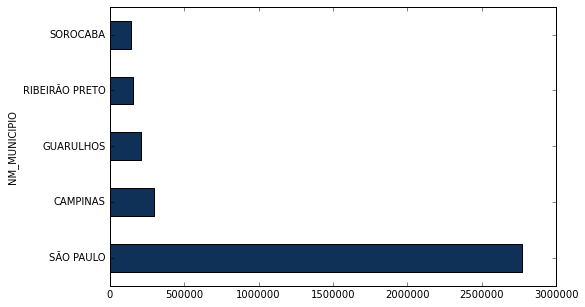

In [166]:
#TOP 5 MAIOR ABSTENÇÃO
y = dadosTurno.query("NR_TURNO =='2'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nlargest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')

<AxesSubplot:ylabel='NM_MUNICIPIO'>

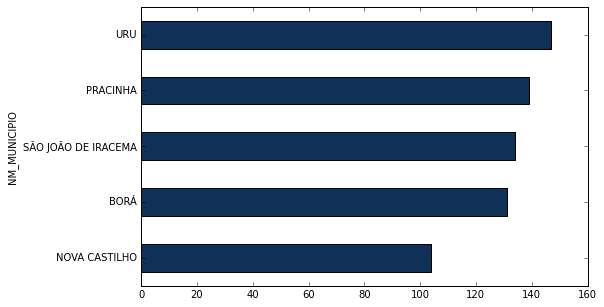

In [167]:
#TOP 5 MENOR ABSTENÇÃO
y = dadosTurno.query("NR_TURNO =='1'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_ABSTENCAO'].sum().sort_values().nsmallest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')

<AxesSubplot:ylabel='NM_MUNICIPIO'>

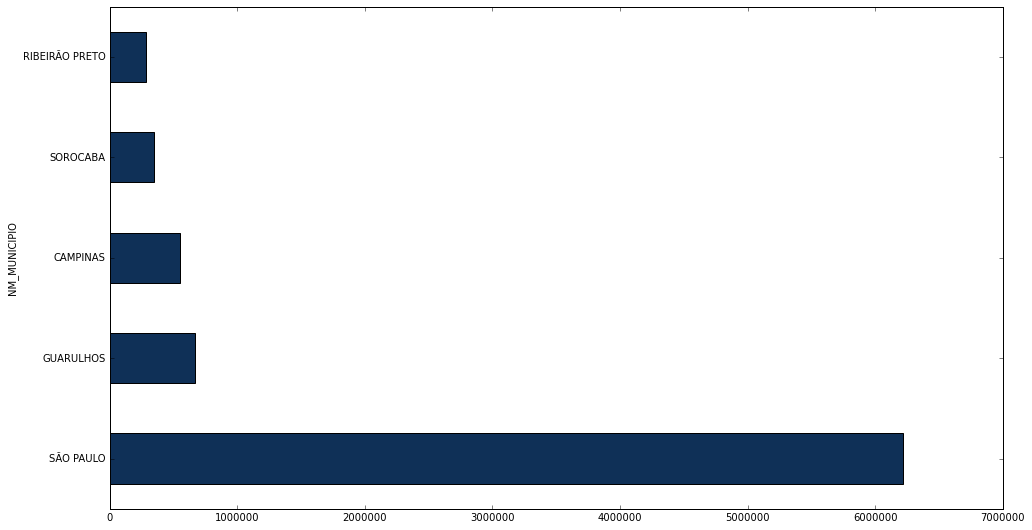

In [168]:
#TOP5 MAIOR COMPARECIMENTO
y = dadosTurno.query("NR_TURNO =='2'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nlargest(5).plot(kind='barh', figsize=(16,9),color = '#0f3057')

<AxesSubplot:ylabel='NM_MUNICIPIO'>

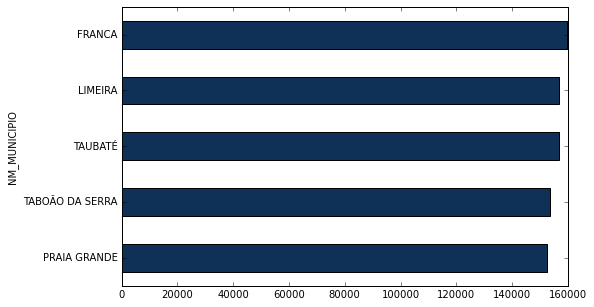

In [169]:
#TOP5 MENOR COMPARECIMENTO
y = dadosTurno.query("NR_TURNO =='2'")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')['QT_COMPARECIMENTO'].sum().sort_values().nsmallest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')